<a href="https://colab.research.google.com/github/ChihabEddine98/DL_course/blob/main/lec8_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

# lecture des donnees et découpage en sequence de seq_len elements
def load_data(filename, seq_len):
    f = open(filename, 'rb').read()
    data = np.array(f.decode().split('\n'), dtype = np.float32)
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :] # 90 % des exemples pour l’apprentissage
    np.random.shuffle(train)
    x_train = train[:, :-1] # On prend les séquences jusqu’à l’avant dernier élément
    y_train = train[:, -1] # On prend le dernier élément comme sortie à apprendre
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    return x_train, y_train, x_test, y_test


In [6]:
X_train, y_train, X_test, y_test = load_data ('sample_data/sinwave.csv', 50)

# Model
model = Sequential()
model.add(layers.LSTM(50, input_shape=(50, 1), return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))
model.compile(loss="mse", optimizer="rmsprop", metrics = ['mae','acc'])

In [8]:
def train():
  with tf.device('/device:GPU:0'):
    return model.fit(X_train, y_train, batch_size=512, epochs=30, validation_split=0.05)

In [9]:
history = train()

Epoch 1/30
9/9 [==============================] - 0s 54ms/step - loss: 0.0107 - mae: 0.0827 - acc: 0.0000e+00 - val_loss: 0.0029 - val_mae: 0.0457 - val_acc: 0.0000e+00
Epoch 2/30
9/9 [==============================] - 0s 48ms/step - loss: 0.0135 - mae: 0.0932 - acc: 0.0000e+00 - val_loss: 0.0027 - val_mae: 0.0452 - val_acc: 0.0000e+00
Epoch 3/30
9/9 [==============================] - 0s 45ms/step - loss: 0.0057 - mae: 0.0606 - acc: 0.0000e+00 - val_loss: 0.0061 - val_mae: 0.0711 - val_acc: 0.0000e+00
Epoch 4/30
9/9 [==============================] - 0s 43ms/step - loss: 0.0144 - mae: 0.0976 - acc: 0.0000e+00 - val_loss: 0.0031 - val_mae: 0.0488 - val_acc: 0.0000e+00
Epoch 5/30
9/9 [==============================] - 0s 40ms/step - loss: 0.0078 - mae: 0.0701 - acc: 0.0000e+00 - val_loss: 0.0054 - val_mae: 0.0610 - val_acc: 0.0000e+00
Epoch 6/30
9/9 [==============================] - 0s 38ms/step - loss: 0.0104 - mae: 0.0831 - acc: 0.0000e+00 - val_loss: 0.0048 - val_mae: 0.0586 - val_ac

In [12]:
predict = model.predict(X_test)

ValueError: ignored

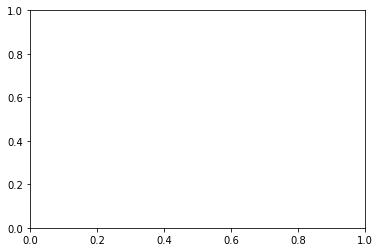

In [24]:
import matplotlib.pyplot as plt


plt.plot(range(1,len(predict+1)),predict)